In [1]:
import os
import time
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


from surprise import BaselineOnly, Dataset, Reader
from surprise.model_selection import cross_validate

In [43]:
cm = sns.light_palette("green", as_cmap=True)

In [2]:
userRatings = pd.read_csv("../data/reducedUserRatings.csv", index_col=0) # issues with outliers and usernames already fixed

In [3]:
userRatings

,BGGId,Rating,Username,reducedUsername
0,2963,7.0,A Friend of Grouchy,A Friend of Grouchy
1,173770,4.0,A Haar,A Haar
2,145632,4.0,A Haar,A Haar
3,13,5.0,A Haar,A Haar
4,30549,7.0,A Haar,A Haar
...,...,...,...,...
65530,822,7.0,Bandfool,Bandfool
65531,253048,8.0,Bandido75,Bandido75
65532,23249,5.0,BandidoDesertao,BandidoDesertao
65533,29352,6.0,BandidoDesertao,BandidoDesertao


In [4]:
def naturalNumber(val):
    """Find all non-natural number ratings"""
    return round(val) ==val

In [5]:
userRatings["isNatural"] = userRatings.Rating.apply(lambda x: naturalNumber(x))

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='isNatural', ylabel='Count'>

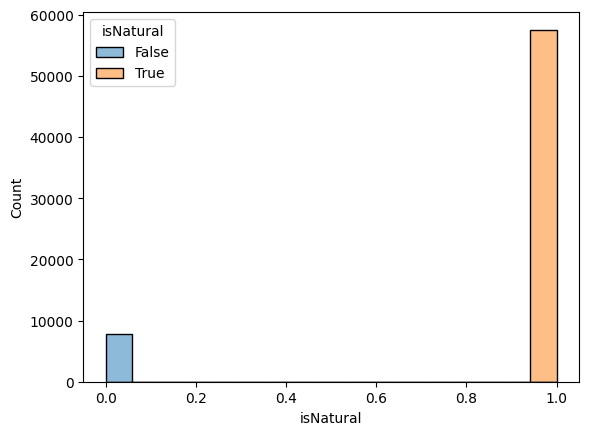

In [6]:
sns.histplot(data=userRatings,x="isNatural",hue="isNatural")

In [7]:
# Number of users 
userRatings.reducedUsername.unique().shape[0]

13060

In [8]:
# Number of items
userRatings.BGGId.unique().shape[0]

9640

In [9]:
# Rating properties

In [10]:
def distplot(figRows,figCols,xSize, ySize, data, features, colors, kde=True, bins=None):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)

def scatterplot(rowFeature, colFeature, data):
    f, axes = plt.subplots(1, 1, figsize=(10, 8))
        
    plot=sns.scatterplot(x=rowFeature, y=colFeature, data=data, ax=axes)
    plot.set_xlabel(rowFeature,fontsize=20)
    plot.set_ylabel(colFeature,fontsize=20)  

In [11]:
pal = sns.color_palette(palette='Set1', n_colors=16)


/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


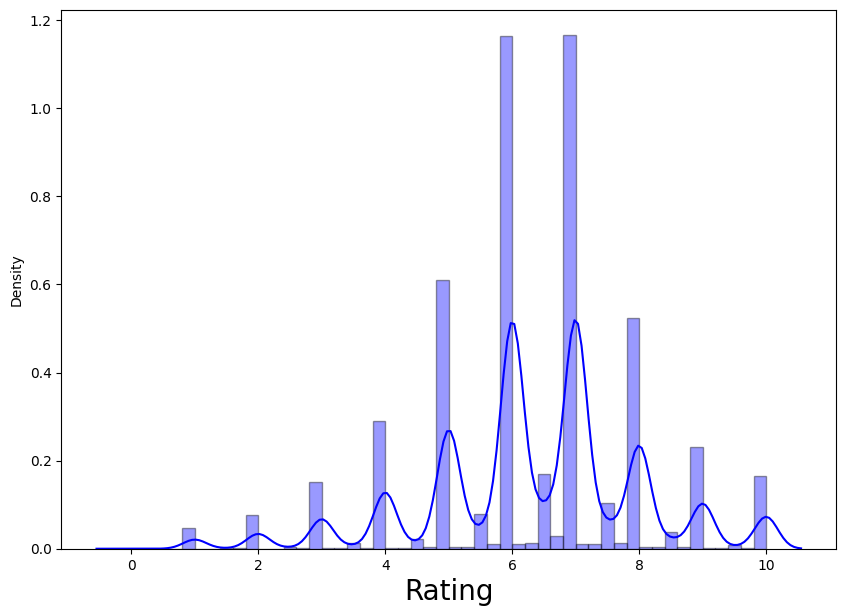

In [12]:
# Rating Distribution

distplot(1, 1, 10, 7, data=userRatings, features=['Rating'], colors=['blue'])

In [13]:
groupby_products_Ratings = userRatings.groupby('BGGId')['Rating']

ratings_products = pd.DataFrame(groupby_products_Ratings.count().clip(upper=30))
ratings_products.rename(columns={"Rating": "Rating_Count"}, inplace=True)

In [14]:
(groupby_products_Ratings.count() ==1).sum()

889

In [15]:
(groupby_products_Ratings.count() ==1).sum()/userRatings.BGGId.unique().shape[0]

0.09221991701244814

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


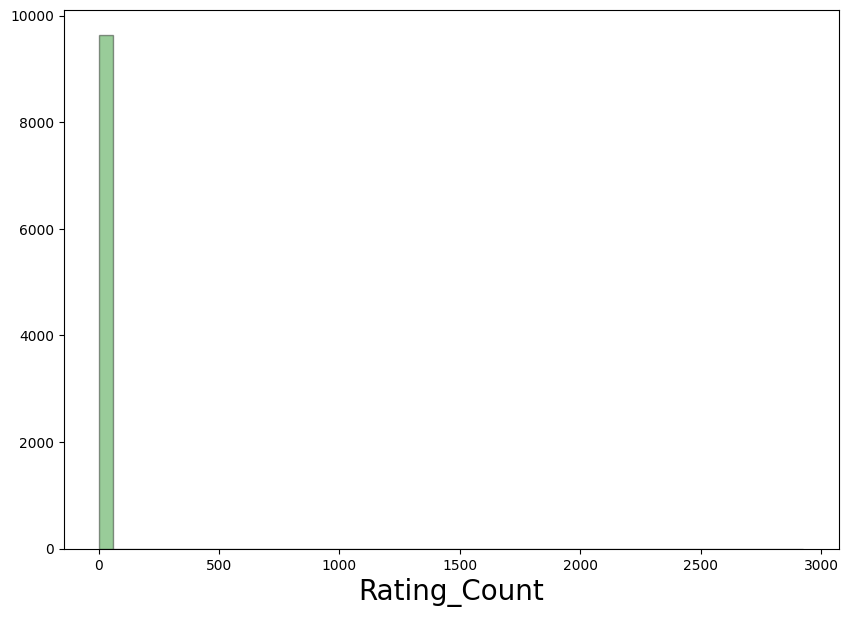

In [16]:
#Count Distribution grouped by Products
distplot(1, 1, 10, 7, data=pd.DataFrame(groupby_products_Ratings.count()).rename(columns={"Rating": "Rating_Count"}), features=['Rating_Count'], colors=['green'], kde=False)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


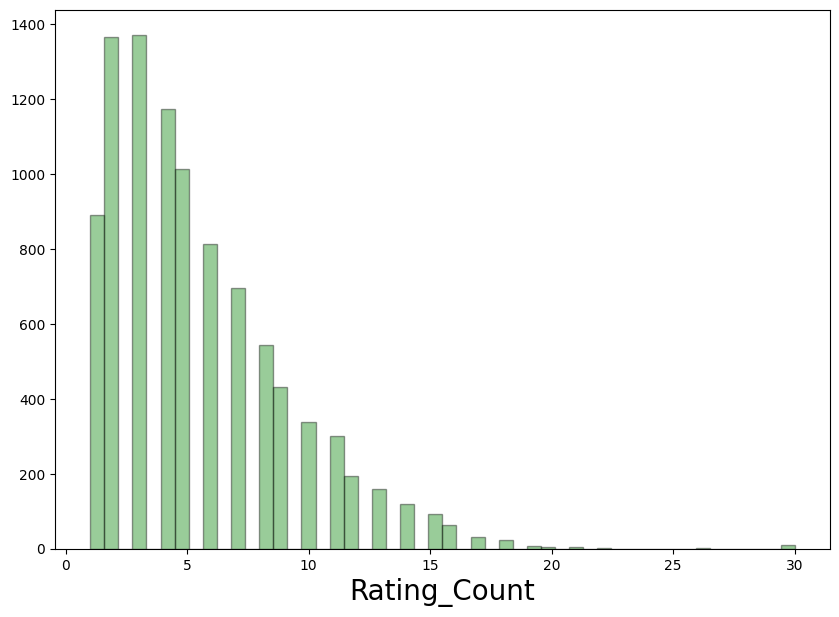

In [17]:
# Top Rating Count Distribution grouped by Products upper 30
distplot(1, 1, 10, 7, data=ratings_products, features=['Rating_Count'], colors=['green'], kde=False)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


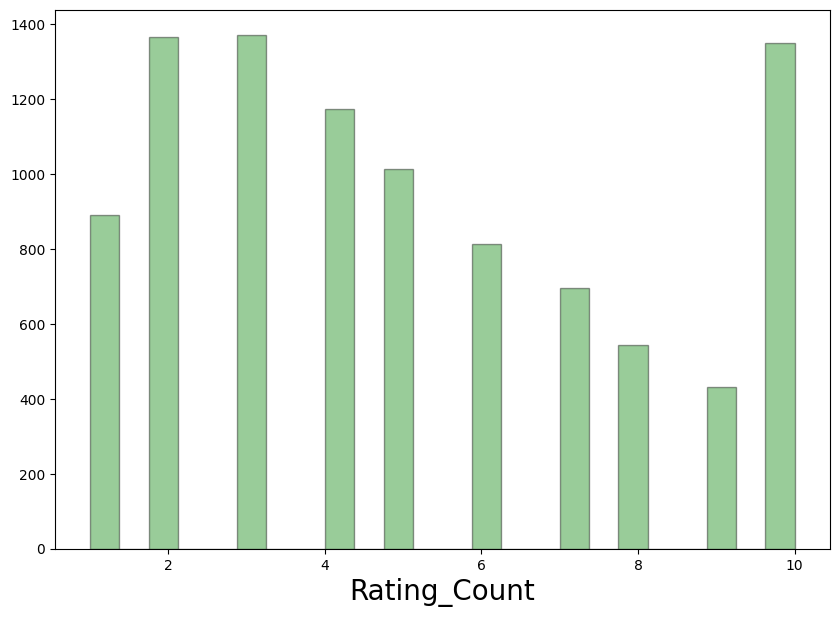

In [18]:
# Top Rating Count Distribution grouped by Products
distplot(1, 1, 10, 7, data=pd.DataFrame(groupby_products_Ratings.count().clip(upper=10)).rename(columns={"Rating": "Rating_Count"}), features=['Rating_Count'], colors=['green'], kde=False)

In [19]:
groupby_users_Ratings = userRatings.groupby('reducedUsername')['Rating']
rating_users = pd.DataFrame(groupby_users_Ratings.count().clip(lower=1, upper=100))
rating_users.rename(columns={"Rating": "Rating_Count"}, inplace=True)

In [20]:
(groupby_users_Ratings.count() ==1).sum()

5018

In [21]:
(groupby_users_Ratings.count() ==1).sum()/userRatings.reducedUsername.unique().shape[0]

0.3842266462480858

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


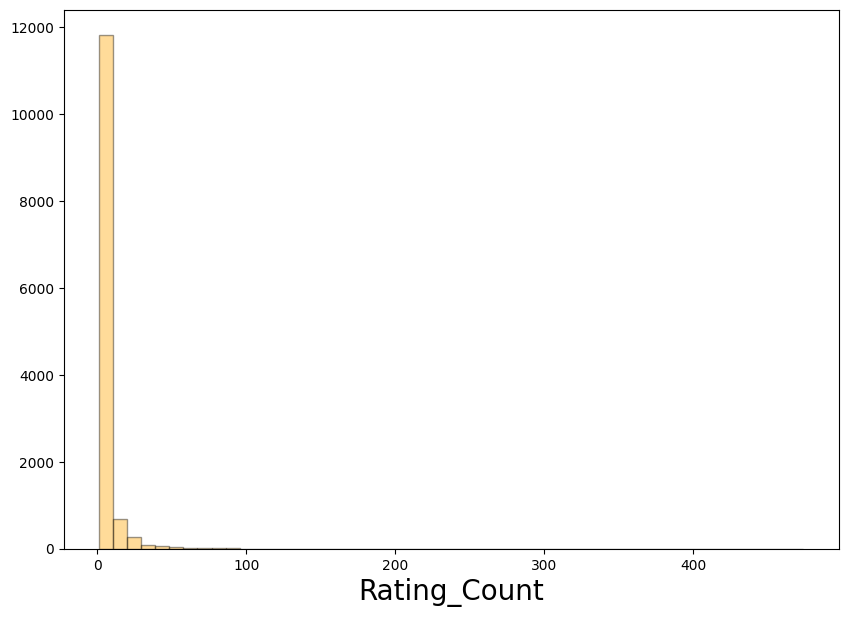

In [22]:
# Top Rating Count Distribution grouped by Users
distplot(1, 1, 10, 7, data=pd.DataFrame(groupby_users_Ratings.count()).rename(columns={"Rating": "Rating_Count"}), features=['Rating_Count'], colors=['orange'], kde=False)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


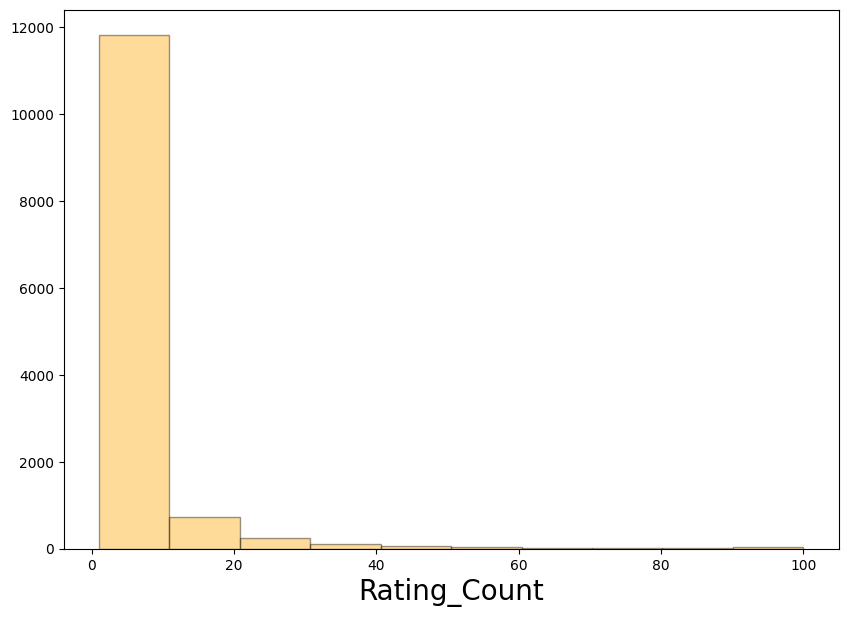

In [23]:
# Top Rating Count Distribution grouped by Users
distplot(1, 1, 10, 7, data=rating_users, features=['Rating_Count'], colors=['orange'], kde=False, bins=10)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


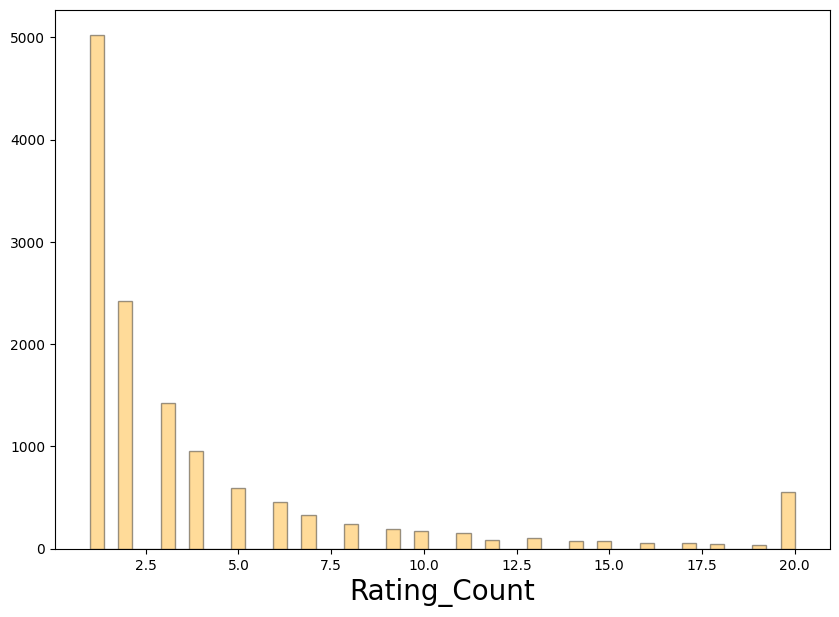

In [24]:
# Top Rating Count Distribution grouped by Users
distplot(1, 1, 10, 7, data=pd.DataFrame(groupby_users_Ratings.count().clip(upper=20)).rename(columns={"Rating": "Rating_Count"}), features=['Rating_Count'], colors=['orange'], kde=False)

In [25]:
ratings = pd.DataFrame(userRatings.groupby('BGGId')['Rating'].mean())
ratings.rename(columns={"Rating": "Rating_Mean"}, inplace=True)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


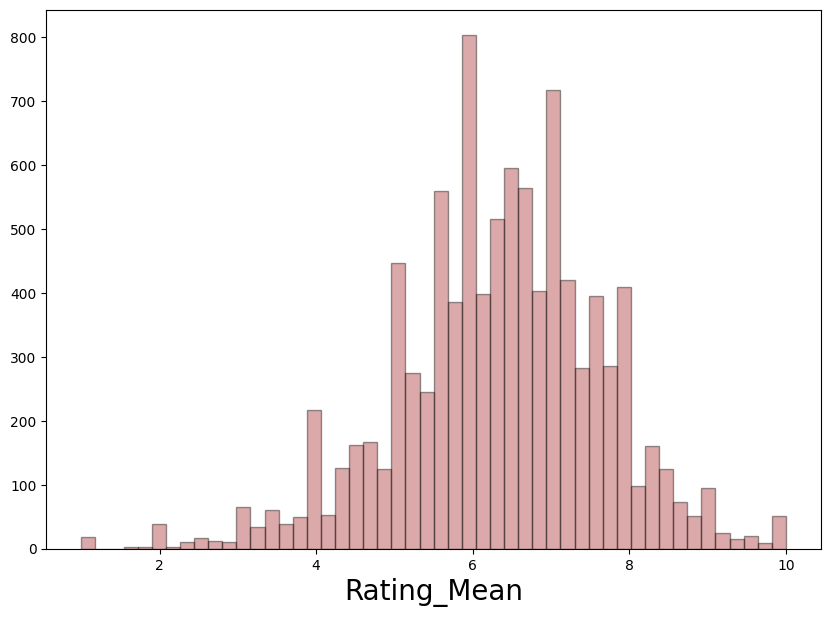

In [26]:
# Mean Rating Distribution grouped by Products
distplot(1, 1, 10, 7, data=ratings, features=['Rating_Mean'], colors=['brown'], kde=False, bins=50)

In [27]:
ratings['Rating_Count'] = userRatings.groupby('BGGId')['Rating'].count()

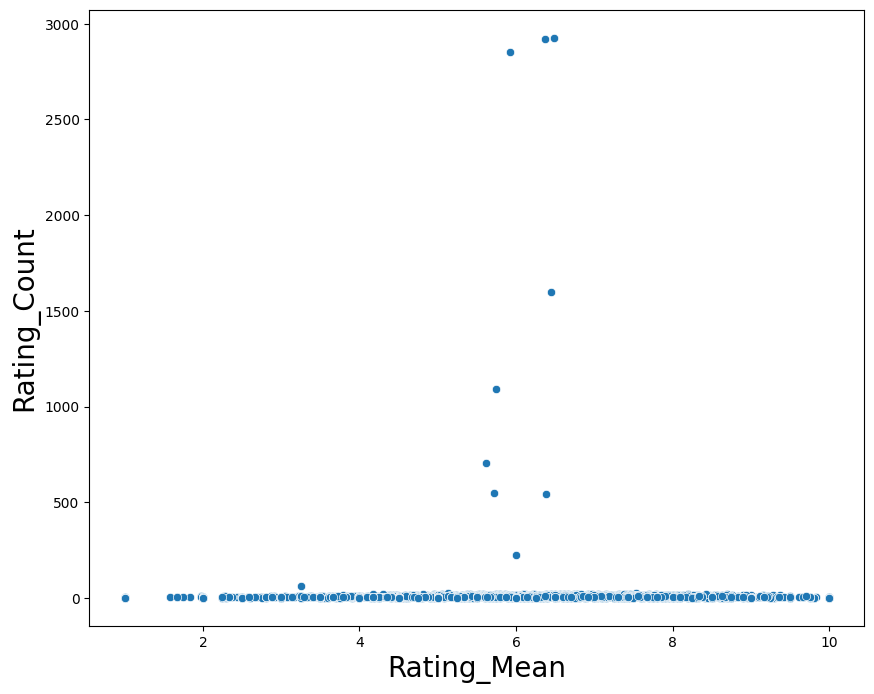

In [28]:
# Mean Rating - Rating Count Distribution grouped by Products
scatterplot('Rating_Mean', 'Rating_Count', data=ratings)

/var/folders/ck/bcrpxpw173z_zbvmzgxf02v80000gp/T/ipykernel_20493/3849997611.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})


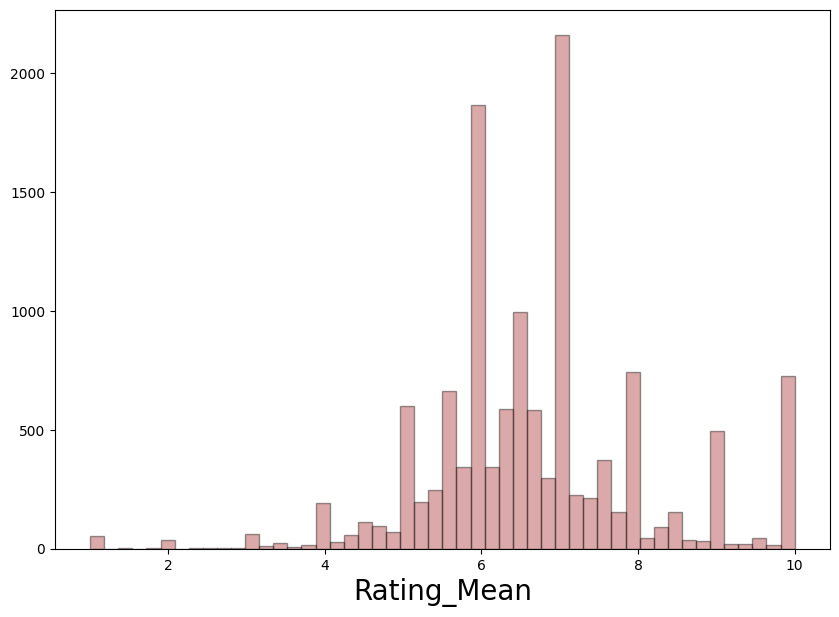

In [29]:
# Mean Rating Distribution grouped by Users
ratings = pd.DataFrame(userRatings.groupby('reducedUsername')['Rating'].mean())
ratings.rename(columns={"Rating": "Rating_Mean"}, inplace=True)
distplot(1, 1, 10, 7, data=ratings, features=['Rating_Mean'], colors=['brown'], kde=False, bins=50)

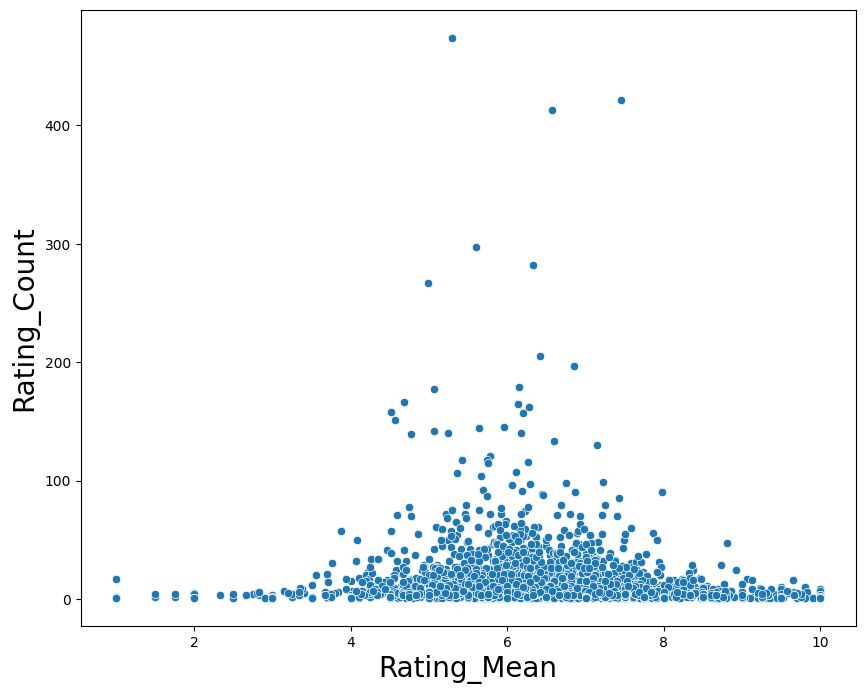

In [30]:
# Mean Rating - Rating Count Distribution grouped by Users
ratings['Rating_Count'] = userRatings.groupby('reducedUsername')['Rating'].count()
scatterplot('Rating_Mean', 'Rating_Count', data=ratings)

In [31]:
from surprise import BaselineOnly, Dataset, Reader, dataset
from surprise.model_selection import cross_validate,RandomizedSearchCV,GridSearchCV, KFold
from surprise import KNNWithMeans,KNNWithZScore,SVD,KNNBaseline,KNNBasic
from surprise import accuracy

from sklearn.pipeline import Pipeline

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
# Let's keep a subset of the data for final testing
trainset, testset = train_test_split(userRatings, test_size=.3, random_state=10)

In [35]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))

# The columns must correspond to user id, item id and ratings (in that order).
traindata = Dataset.load_from_df(trainset[["reducedUsername", "BGGId", "Rating"]], reader)

In [36]:
traindata.has_been_split

False

In [37]:
# Since we cannot do pipeline Gridsearch, we will fix the cross valdiation folds for model comparison
cv = KFold(n_splits=3, shuffle=False, random_state = 100)

In [38]:
model_list = {"KNNBasic_pearson_user":KNNBasic(sim_options={'name':'pearson' , 'user_based':True}),
             "KNNBasic_pearson_item":KNNBasic(sim_options={'name':'pearson' , 'user_based':False}),
             "KNNBasic_cosine_user":KNNBasic(sim_options={'name':'cosine' , 'user_based':True}),
             "KNNBasic_cosine_item":KNNBasic(sim_options={'name':'cosine' , 'user_based':False}),
             "KNNBasic_MSD_user":KNNBasic(sim_options={'name':'MSD' , 'user_based':True}),
             "KNNBasic_MSD_item":KNNBasic(sim_options={'name':'MSD' , 'user_based':False}),
             "KNNBasic_pearson_baseline_user":KNNBasic(sim_options={'name':'pearson_baseline' , 'user_based':True}),
             "KNNBasic_pearson_baseline_item":KNNBasic(sim_options={'name':'pearson_baseline' , 'user_based':False}),
              
             "KNNWithZScore_pearson_user":KNNWithZScore(sim_options={'name':'pearson' , 'user_based':True}),
             "KNNWithZScore_pearson_item":KNNWithZScore(sim_options={'name':'pearson' , 'user_based':False}),
             "KNNWithZScore_cosine_user":KNNWithZScore(sim_options={'name':'cosine' , 'user_based':True}),
             "KNNWithZScore_cosine_item":KNNWithZScore(sim_options={'name':'cosine' , 'user_based':False}),
             "KNNWithZScore_MSD_user":KNNWithZScore(sim_options={'name':'MSD' , 'user_based':True}),
             "KNNWithZScore_MSD_item":KNNWithZScore(sim_options={'name':'MSD' , 'user_based':False}),
             "KNNWithZScore_pearson_baseline_user":KNNWithZScore(sim_options={'name':'pearson_baseline' , 'user_based':True}),
             "KNNWithZScore_pearson_baseline_item":KNNWithZScore(sim_options={'name':'pearson_baseline' , 'user_based':False}),

             "KNNWithMeans_pearson_user":KNNWithMeans(sim_options={'name':'pearson' , 'user_based':True}),
             "KNNWithMeans_pearson_item":KNNWithMeans(sim_options={'name':'pearson' , 'user_based':False}),
             "KNNWithMeans_cosine_user":KNNWithMeans(sim_options={'name':'cosine' , 'user_based':True}),
             "KNNWithMeans_cosine_item":KNNWithMeans(sim_options={'name':'cosine' , 'user_based':False}),
             "KNNWithMeans_MSD_user":KNNWithMeans(sim_options={'name':'MSD' , 'user_based':True}),
             "KNNWithMeans_MSD_item":KNNWithMeans(sim_options={'name':'MSD' , 'user_based':False}),
             "KNNWithMeans_pearson_baseline_user":KNNWithMeans(sim_options={'name':'pearson_baseline' , 'user_based':True}),
             "KNNWithMeans_pearson_baseline_item":KNNWithMeans(sim_options={'name':'pearson_baseline' , 'user_based':False}),
              
             "KNNBaseline_pearson_user":KNNBaseline(sim_options={'name':'pearson' , 'user_based':True}),
             "KNNBaseline_pearson_item":KNNBaseline(sim_options={'name':'pearson' , 'user_based':False}),
             "KNNBaseline_cosine_user":KNNBaseline(sim_options={'name':'cosine' , 'user_based':True}),
             "KNNBaseline_cosine_item":KNNBaseline(sim_options={'name':'cosine' , 'user_based':False}),
             "KNNBaseline_MSD_user":KNNBaseline(sim_options={'name':'MSD' , 'user_based':True}),
             "KNNBaseline_MSD_item":KNNBaseline(sim_options={'name':'MSD' , 'user_based':False}),
             "KNNBaseline_pearson_baseline_user":KNNBaseline(sim_options={'name':'pearson_baseline' , 'user_based':True}),
             "KNNBaseline_pearson_baseline_item":KNNBaseline(sim_options={'name':'pearson_baseline' , 'user_based':False}),
             
             "SVD":SVD( n_epochs=50)}

In [39]:
# Here the metrics are the average scores over the cross validation folds
results = pd.DataFrame(index= model_list.keys(), columns=['test_rmse','test_mae','fit_time','test_time'])

In [40]:
%%time
for i,v in enumerate(model_list):
    dictonary = cross_validate(model_list[v], traindata, cv=cv, verbose=True,)
    for key in dictonary.keys():
        results.loc[v,key] = np.mean((dictonary[key]))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.6993  1.6949  1.7029  1.6990  0.0033  
MAE (testset)     1.2937  1.2923  1.2974  1.2944  0.0021  
Fit time          6.18    4.48    3.81    4.82    1.00    
Test time         1.66    1.52    1.63    1.60    0.06    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.6999  1.6942  1.7047  1.6996  0.0043  
MAE (te

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.6810  1.6849  1.6898  1.6852  0.0036  
MAE (testset)     1.2585  1.2635  1.2574  1.2598  0.0026  
Fit time          4.29    3.74    3.47    3.83    0.34    
Test time         1.63    1.45    1.55    1.54    0.07    
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_bas

Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.5805  1.5888  1.5821  1.5838  0.0036  
MAE (testset)     1.1844  1.1906  1.1860  1.1870  0.0026  
Fit time          1.97    2.10    2.11    2.06    0.06    
Test time         0.35    0.35    0.38    0.36    0.01    
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fol

In [47]:
results.sort_values(by=['test_rmse','test_mae'], ascending=True).style.bar(color='#d65f5f')

,test_rmse,test_mae,fit_time,test_time
SVD,1.494093,1.113301,1.115035,0.111036
KNNBaseline_pearson_item,1.542511,1.157856,2.570251,0.337348
KNNBaseline_pearson_baseline_item,1.543005,1.158294,2.028772,0.333032
KNNBaseline_pearson_user,1.544289,1.156497,4.172291,1.673182
KNNBaseline_pearson_baseline_user,1.549313,1.161351,3.128915,1.524465
KNNBaseline_cosine_item,1.583778,1.187013,2.058964,0.363998
KNNBaseline_MSD_item,1.585541,1.188243,1.584147,0.549592
KNNBaseline_cosine_user,1.595511,1.197261,2.908727,1.664080
KNNBaseline_MSD_user,1.597386,1.198174,2.094476,1.614696
KNNWithMeans_pearson_user,1.676396,1.251869,4.601899,1.732236


## Gridsearch for tuning some parameters

In [49]:
model_dict = {"KNNBasic":KNNBasic,
              "KNNBaseline":KNNBaseline,
             "KNNWithZScore":KNNWithZScore,
             "KNNWithMeans":KNNWithMeans,
             "SVD": SVD
             }



In [50]:
similarities = ["pearson","cosine","MSD","pearson_baseline"]

In [51]:
param_dict = {"KNNBasic":{
                            'k': [101],
                            'sim_options': {
                                'name': similarities,
                                'min_support': [1, 5, 10],
                                'user_based': [False, True],
                                'shrinkage': [0, 10,100]
                            },
                        },
              "KNNWithZScore":{
                            'k': [101],
                            'sim_options': {
                                'name': similarities,
                                'min_support': [1, 5, 10],
                                'user_based': [False, True],
                                'shrinkage': [0, 10,100]
                            },
                        },
                "KNNWithMeans":{
                            'k': [101],
                            'sim_options': {
                                'name': similarities,
                                'min_support': [1, 5, 10],
                                'user_based': [False, True],
                                'shrinkage': [0, 10,100]
                            },
                        },
              "KNNBaseline":{
                            'k': [101],
                            'sim_options': {
                                'name': similarities,
                                'min_support': [1, 5, 10],
                                'user_based': [False, True],
                                'shrinkage': [0, 10,100]
                            },
                          "bsl_options" : {
                                    "method": ["sgd",'als'],
                                    'reg_i' :[0,5,10],
                                    'reg_u' : [0,5,10],
                                    'reg': [0.00005, 0.005,0.5],
                                    "learning_rate": [0.00005, 0.005,0.5],
                                    'n_epochs': [20]
                                }
                        },
              "SVD":{"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
            
             
             
             
             
             
             
             }

In [52]:
gs_results= pd.DataFrame()

In [ ]:
### Fix this

In [53]:
for i in model_dict:
    model = model_dict[i]
    parameters = param_dict[i]
    
    gs = GridSearchCV(model, parameters, measures=["rmse", "mae"], cv=cv)
    gs.fit(traindata)
    gs.results = pd.concat([gs_results,pd.DataFrame.from_dict(gs.cv_results)])

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity ma

Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd.

Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd.

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als.

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als.

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als.

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd.

Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd.

KeyboardInterrupt: 

In [54]:
gs_results

""


#### Lets build a pipeline for hyperparameter tuning and model selection all at once

In [ ]:
from enum import Enum
class Model(Enum):
    KNNWithZScore='z standrdized CF'
    KNNWithMeans='baseline centered CF'
    all= 'best model'



model_list = [e for e in Model if e != Model.all]
model_instances = []
params = []

num_folds = 5  # Hard coded
scoring = ['rmse', 'mae']

#clf1 = KNNWithZScore(verbose=True)
#param1 = {}
#param1['k'] = [50]
#param1['sim_options'] =  {
#                                        'name': ['pearson', 'cosine'],
#                                        'min_support': [1, 5],
#                                        'user_based': [False, True],
#                                    }
#param1['regressor'] = [clf1]
#model_instances.append(clf1)
#params.append(param1)

gs = GridSearchCV(clf1, param1, cv=num_folds, measures=scoring, refit=True,joblib_verbose=2)


gs.fit(traindata)

if Model.KNNWithZScore in model_list:
        clf1 = KNNWithZScore#(verbose=True)
        param1 = {}
        param1['regressor__k'] = [50]
        param1['regressor__sim_options'] =  {
                                                'name': ['pearson', 'cosine'],
                                                'min_support': [1, 5],
                                                'user_based': [False, True],
                                            },
        param1['regressor'] = [clf1]
        model_instances.append(clf1)
        params.append(param1)


        
pipeline = Pipeline([('regressor', model_instances[0])])


gs = GridSearchCV(pipeline, params, cv=num_folds, measures=scoring, refit=True,joblib_verbose=2)

gs.fit(traindata)


In [ ]:
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    #"min_support": [3, 4, 5],
    "user_based": [False],
}

In [ ]:
knn_model = KNNWithMeans(k=10,sim_options={'name':'pearson' , 'user_based':True})
knn_model.fit(traindata)

In [ ]:
accuracy.rmse(test_pred_knn)

In [ ]:
#Evaluation on testset

test_pred_knn=knn_model.test(testset)

# compute RMSE
accuracy.rmse(test_pred_knn)

In [ ]:
test_pred_df = pd.DataFrame(test_pred_knn)

In [ ]:
test_pred_df.sort_values(by=["uid","iid","r_ui"], ascending=False)

In [ ]:
# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, trainset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}

In [ ]:
cross_validate(KNNWithZScore(sim_options=sim_options), traindata, cv=2)

In [ ]:
cv_result = cross_validate(KNNWithZScore(sim_options=sim_options), trainset, cv=5)

In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [ ]:
class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None

    def fit_and_predict(self):        
        printmd('**Fitting the train data...**', color='brown')
        self.model.fit(self.trainset)       

        printmd('**Predicting the test data...**', color='brown')
        self.pred_test = self.model.test(self.testset)        
        rmse = round(accuracy.rmse(self.pred_test), 3)
        printmd('**RMSE for the predicted result is ' + str(rmse) + '**', color='brown')   
        
        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns=['userId', 'productId', 'Rating'])
        for item in self.top_n:
            subdf = pd.DataFrame(self.top_n[item], columns=['productId', 'Rating'])
            subdf['userId'] = item
            cols = subdf.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            subdf = subdf[cols]        
            self.recommenddf = pd.concat([self.recommenddf, subdf], axis = 0)        
        return rmse
        
    def cross_validate(self):
        printmd('**Cross Validating the data...**', color='brown')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        printmd('**Mean CV RMSE is ' + str(cv_result)  + '**', color='brown')
        return cv_result

    def recommend(self, user_id, n=5):
        printmd('**Recommending top ' + str(n)+ ' products for userid : ' + user_id + ' ...**', color='brown')
        
        #df = pd.DataFrame(self.top_n[user_id], columns=['productId', 'Rating'])
        #df['UserId'] = user_id
        #cols = df.columns.tolist()
        #cols = cols[-1:] + cols[:-1]
        #df = df[cols].head(n)
        df = self.recommenddf[self.recommenddf['userId'] == user_id].head(n)
        display(df)
        return df

In [ ]:
from surprise.model_selection import RandomizedSearchCV

def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)             
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

In [ ]:
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}


In [ ]:
clf = find_best_model(KNNWithZScore, params, trainset)